In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
plt.style.use('ggplot')

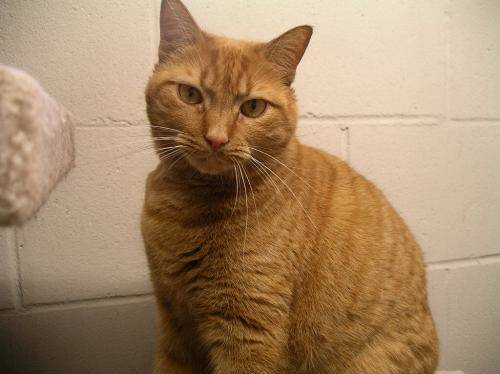

In [2]:
imgData = image.load_img('image/cat/cat1.jpg')
imgData

In [3]:
type(imgData)

PIL.JpegImagePlugin.JpegImageFile

In [4]:
dataGen = image.ImageDataGenerator(rescale=1./255)

In [5]:
trainGen= dataGen.flow_from_directory('image',target_size=(98,98))

Found 20 images belonging to 2 classes.


In [6]:
type(trainGen)

keras.preprocessing.image.DirectoryIterator

In [7]:
x_train,y_train = trainGen.next()

In [8]:
x_train.shape , y_train.shape

((20, 98, 98, 3), (20, 2))

In [9]:
x_train

array([[[[0.12156864, 0.12156864, 0.07450981],
         [0.11764707, 0.11764707, 0.07058824],
         [0.1137255 , 0.1137255 , 0.06666667],
         ...,
         [0.2392157 , 0.23529413, 0.0627451 ],
         [0.3019608 , 0.3137255 , 0.09803922],
         [0.59607846, 0.627451  , 0.33333334]],

        [[0.12156864, 0.12156864, 0.07450981],
         [0.11764707, 0.11764707, 0.07058824],
         [0.1137255 , 0.1137255 , 0.06666667],
         ...,
         [0.23529413, 0.23529413, 0.03921569],
         [0.2627451 , 0.27450982, 0.0509804 ],
         [0.45882356, 0.48627454, 0.21176472]],

        [[0.12156864, 0.12156864, 0.07450981],
         [0.11764707, 0.11764707, 0.07058824],
         [0.1137255 , 0.1137255 , 0.06666667],
         ...,
         [0.28627452, 0.2901961 , 0.05490196],
         [0.28235295, 0.29803923, 0.06666667],
         [0.3803922 , 0.4039216 , 0.15294118]],

        ...,

        [[0.38431376, 0.3254902 , 0.        ],
         [0.3254902 , 0.26666668, 0.00392157]

In [10]:
y_train #  oh 인코딩

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

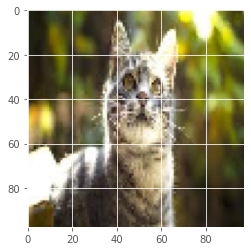

In [11]:
plt.imshow(x_train[0])

In [12]:
# 분류값 확인
trainGen.class_indices

{'cat': 0, 'dog': 1}

In [13]:
 x_train.reshape(20, -1)

array([[0.12156864, 0.12156864, 0.07450981, ..., 0.1137255 , 0.09803922,
        0.05490196],
       [0.9215687 , 0.9294118 , 0.9176471 , ..., 0.8078432 , 0.81568635,
        0.7960785 ],
       [0.3019608 , 0.27450982, 0.20392159, ..., 0.7843138 , 0.8000001 ,
        0.91372555],
       ...,
       [0.12941177, 0.09411766, 0.09803922, ..., 0.59607846, 0.6       ,
        0.5803922 ],
       [0.00784314, 0.10196079, 0.0509804 , ..., 0.1764706 , 0.19607845,
        0.07843138],
       [0.2509804 , 0.4156863 , 0.16470589, ..., 0.58431375, 0.7490196 ,
        0.34901962]], dtype=float32)

In [14]:
x_train.shape 

(20, 98, 98, 3)

In [22]:
# flatten 쓰면 인코딩 안해도됨. 3차원 데이터
model = Sequential()
model.add(Flatten(input_shape = (98,98,3)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=2,  activation='softmax' )  )

# model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.compile( loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train,epochs=50)
h = model.fit(x_train, y_train,epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 220ms/step - loss: 0.7319 - acc: 0.4500
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 6.2095 - acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 5.4820 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 0.4958 - acc: 0.7500
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 0.8358 - acc: 0.5500
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 2.1629 - acc: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.9143 - acc: 0.6500
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 1.0020 - acc: 0.6000
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 0.8211 - acc: 0.6500
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2286 - acc: 0.9000
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 0.7071 - acc: 0.

1/1 [==============================] - 0s 7ms/step - loss: 0.0051 - acc: 1.0000
Epoch 41/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0051 - acc: 1.0000
Epoch 42/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0051 - acc: 1.0000
Epoch 43/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0050 - acc: 1.0000
Epoch 44/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0050 - acc: 1.0000
Epoch 45/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0049 - acc: 1.0000
Epoch 46/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0049 - acc: 1.0000
Epoch 47/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0048 - acc: 1.0000
Epoch 48/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0048 - acc: 1.0000
Epoch 49/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0047 - acc: 1.0000
Epoch 50/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0047 - acc: 1.0000


In [21]:
model.save('catdog.h5')

# h5는 모델 압축 파일

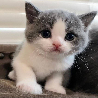

In [16]:
testImg = image.load_img('image/test.jpg',target_size=(98,98))
testImg

In [17]:
type(testImg)

PIL.Image.Image

In [18]:
imgArr = image.img_to_array(testImg) #  넘파이 배열로 만듦
imgArr = imgArr/255   #  스케일링

In [19]:
imgArr.shape

(98, 98, 3)

In [20]:
model.predict(imgArr.reshape(1,98,98,3)).argmax(axis=1)

array([1], dtype=int64)

1x(98*98*3) (98*98*3)x64   1 x  64   64 x 32   1x32   32 x 2  => 1x2

In [26]:
import pickle
fp = open('catdog.history','wb')
pickle.dump(h.history,fp)
fp.close()

In [25]:
import shelve
sh = shelve.open('myhist')
sh['myh'] = h.history
sh.close()